**Part1:** Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

**Answer**: The primary objective of this assignment is to find the pattern of the data set. For this, I will use different clustering algorithms. Some benefits of data clustering are as follows:

- Can separate the data into different groups based on their data pattern.

- Label the unlabeled data. Add a new label or add a label based on the label of some existing data.

- Improve the performance of the supervised learning.

Moreover, we also use dimensionality reduction algorithms to reduce the dimension of the data. We then plot the data in the two-dimensional plot to show the data clusters.  

**Part 2:** Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

**Answer:** I will be using the iris dataset for this assignment. This is a well-known data set. I downloaded the data set from the scikit-learn dataset library. The next few lines of codes show more details about this dataset.

Here, my goal is to cluster the data set based on the feature values.

In [61]:
# Importing Modules
from sklearn import datasets
# Loading dataset
iris_df = datasets.load_iris()


In [62]:
# Importing Modules
import pandas as pd
from random import sample
#all data in a data frame
df=pd.DataFrame(iris_df.data,columns=iris_df.feature_names)
#show 5 random data samples
df.sample(n=5, replace=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
102,7.1,3.0,5.9,2.1
72,6.3,2.5,4.9,1.5
77,6.7,3.0,5.0,1.7
63,6.1,2.9,4.7,1.4
27,5.2,3.5,1.5,0.2


In [63]:
#print the number of rows
print(df.shape[0])
#print the list of columns
print(df.columns.to_list())
#Information about the data
df.info()

150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Part3:** Brief summary of data exploration and actions taken for data cleaning and feature engineering.

**Answer:** Summary of data exploration are as follows:

- Check the first few examples (rows) from the dataset to get an idea about the data. Also, check the total number of rows. There are 150 rows in the data set.
-  Check the number of columns and their name (feature variables) including the target variable name. Also, check the data type of each variable. There are only 4 variables and no target variable. All variables have floating-point values. 
- Check whether the data have any duplicate value, missing value, null value. I did not found any missing value in our dataset.
- Check the mean, 25%, median, 75%, and the range of all features. Here different feature has a different range.

All actions taken for data cleaning and feature engineering are as follows:

 - As there is no duplicate and unnecessary data, we do not remove or update any data. 
 - There are also no missing data. So, we do not need to impute the missing data.
 - We scale all the features in [0,1]. Some clustering algorithms de not need the scaled data (example: DBSSCAN) where I used the original data set.
 - I used histogram and boxplot to detect outliner data of each feature. Some clustering algorithm is also sensitive to outlier data.
 - All the features have real data. So, I do not need to encode the feature. 

In [64]:
#Chack the data duplicacy
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
#check the null value
df.isnull().sum().sort_values()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
#data description
statas_df=df.describe()
statas_df.loc['range']=statas_df.loc['max']-statas_df.loc['min']
out_fields=['mean','25%','50%','75%','range']
statas_df=statas_df.loc[out_fields]
statas_df.rename({'50%':'median'},inplace=True)
print(statas_df)

        sepal length (cm)  ...  petal width (cm)
mean             5.843333  ...          1.199333
25%              5.100000  ...          0.300000
median           5.800000  ...          1.300000
75%              6.400000  ...          1.800000
range            3.600000  ...          2.400000

[5 rows x 4 columns]


In [ ]:
#scale the features
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df))

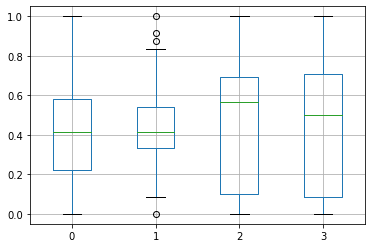

In [ ]:
#check the outlier data
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot()

**Part4:** Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

**Answer:** Here is the list of three clustering techniques and their summary:

- K-means clustering: Based on our argument it randomly chooses the center points (inputs) for clusters. Based on the distance between each point, the next given inputs are segregated into respected clusters and the centroids are re-computed for all the clusters.

- Hierarchical clustering: Is is an algorithm that builds a hierarchy of clusters. This algorithm begins with all the data assigned to a cluster, then the two closest clusters are joined into the same cluster. The algorithm ends when only a single cluster is left.

- Density-based spatial clustering of applications with noise (DBSCAN): It is a popular clustering algorithm used as a replacement for k-means in predictive analytics. To run it doesn’t require input for the number of clusters but it does need to tune two other parameters.

The detailed implementation of these three clustering algorithms is given below.


In [ ]:
# Implemenatation of K-means clustering
from sklearn.cluster import KMeans
# Declaring Model
model = KMeans(n_clusters=3)
# Fitting Model
model.fit(df)
# Prediction on the entire data
all_predictions = model.predict(df)
# Printing Predictions
print(all_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


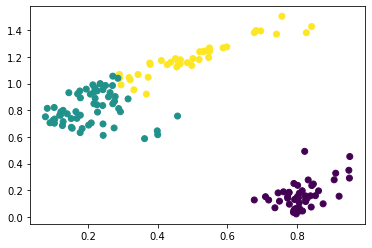

In [ ]:
# Show the K-means cluster in 2-d plot
transformed = model.fit_transform(df)
# Plotting 2d 
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
#plot predicted cluster
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

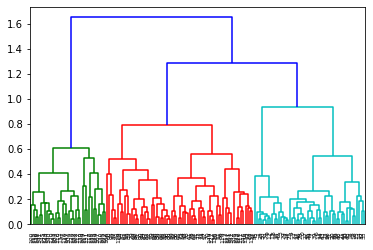

In [ ]:
# Implemenatation of Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

#construct the hierarchical clustering 
mergings = linkage(df.values, method='complete')
#Plot a dendrogram using the dendrogram() function on mergings
dendrogram(mergings,leaf_rotation=90, leaf_font_size=6)
plt.show()

In [ ]:
# Implemenatation of DBSCAN
from sklearn.cluster import DBSCAN
# Declaring Model
dbscan = DBSCAN()
# Fitting the model (used original data)
dbscan.fit(iris_df.data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

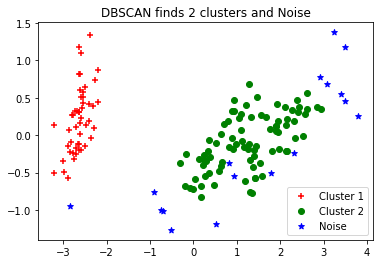

In [ ]:
# Show the clusters and noice of DBSCAN in 2-d plot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Transform data using PCA to draw them in a plot
pca = PCA(n_components=2).fit(iris_df.data)
pca_2d = pca.transform(iris_df.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

**Part5:** A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

**Answer:** Here are my recommendations:

- K-means clustering is fast as it does not have too much computation. However, it has the issue to identify the right number of clusters. It also chooses the random cluster center, therefore, results can have a lack of consistency.  K-means clustering is also sensitive to the choice of distance.

- Hierarchical clustering does not need to specify the number of clusters. Users have the option to choose the best-looking cluster. It is also not sensitive to the choice of distance. However, the hierarchical clustering algorithm does not identify the outlier.

- DBSCAN is better than K-means clustering as it does not require a pre-number of clusters and it can identify outlier data as noise. However, it does not work well for the data that has varying densities and when the data dimension is too high.



**Part6:** Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

**Answer:** All the key findings and insights are as follows:

- All the features in this data set are numeric though the different feature has a different range. For some algorithms, we bring data feature values in the same range. However, this is not mandatory.

- The number of clusters in the dataset depends on the choice of algorithm. In some cases, there are two clusters and three clusters for other cases.

-  We have the outlier data. So during clustering, we should focus on the model that can handle outlier data such as DBSCAN.

- Clustering algorithm may overfit by finding patterns in attributes that only exist in this dataset and don't generalize to new, unseen data. This may happen in hierarchical clustering if we choose too many clusters. In this case, we can use the model that does not have any overfitting issues.

- From the performance point of view, a complex model is better such as DBSCAN. For interpretability, it is better to use the less complex model such as K-means clustering.

**Part7:** Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

**Answer:** Here is the list of suggestions for the next steps which may include suggesting revisiting the model or adding specific data features to achieve a better model.

- Can use other clustering algorithms such as Mean Shift, Gaussian Mixer Mods, etc.

- Tune the hyperparameter of the model. For example, some clustering algorithms are sensitive to the distance metrics such as K-means clustering. In K-means clustering, we can try by using the L1 distance rather than the L2 distance. We may also tune the cluster number of K-means clustering.

- A clustering algorithm may overfit by the seen data. In this case, we should ensure that the model generalizes well.

- We can even construct a better cluster by increasing or decreasing the number of features of the data set.